<a href="https://colab.research.google.com/github/cyluck3/data_analysis/blob/main/An%C3%A1lisis_de_Ventas_con_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [2]:
data = {
    'ID_Transaccion': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008],
    'ID_Producto': ['P001', 'P002', 'P001', 'P003', 'P002', 'P004', 'P001', 'P003'],
    'Nombre_Producto': ['Camisa', 'Pantalón', 'Camisa', 'Zapatos', 'Pantalón', 'Calcetines', 'Camisa', 'Zapatos'],
    'Cantidad': [2, 1, 3, 1, 2, 5, 1, 1],
    'Precio_Unitario': [25.50, 45.00, 25.50, 60.00, 45.00, 8.00, 25.50, 60.00],
    'Fecha_Venta': ['2024-01-05', '2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08', '2024-01-08', '2024-01-09', '2024-01-10'],
    'Pais': ['España', 'España', 'México', 'Argentina', 'Chile', 'España', 'México', 'Argentina'],
    'Metodo_Pago': ['Tarjeta', 'Efectivo', 'Tarjeta', 'Transferencia', 'Tarjeta', 'Efectivo', 'Tarjeta', 'Transferencia']
}


In [3]:
# DataFrame
df = pd.DataFrame(data)

print("Dataset de ejemplo creado exitosamente. Las primeras 5 filas son:")
print(df.head())

Dataset de ejemplo creado exitosamente. Las primeras 5 filas son:
   ID_Transaccion ID_Producto Nombre_Producto  Cantidad  Precio_Unitario  \
0            1001        P001          Camisa         2             25.5   
1            1002        P002        Pantalón         1             45.0   
2            1003        P001          Camisa         3             25.5   
3            1004        P003         Zapatos         1             60.0   
4            1005        P002        Pantalón         2             45.0   

  Fecha_Venta       Pais    Metodo_Pago  
0  2024-01-05     España        Tarjeta  
1  2024-01-05     España       Efectivo  
2  2024-01-06     México        Tarjeta  
3  2024-01-07  Argentina  Transferencia  
4  2024-01-08      Chile        Tarjeta  


In [4]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID_Transaccion   8 non-null      int64  
 1   ID_Producto      8 non-null      object 
 2   Nombre_Producto  8 non-null      object 
 3   Cantidad         8 non-null      int64  
 4   Precio_Unitario  8 non-null      float64
 5   Fecha_Venta      8 non-null      object 
 6   Pais             8 non-null      object 
 7   Metodo_Pago      8 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 644.0+ bytes


,ID_Transaccion,Cantidad,Precio_Unitario
count,8.00000,8.000000,8.000000
mean,1004.50000,2.000000,36.812500
std,2.44949,1.414214,18.606714
min,1001.00000,1.000000,8.000000
25%,1002.75000,1.000000,25.500000
50%,1004.50000,1.500000,35.250000
75%,1006.25000,2.250000,48.750000
max,1008.00000,5.000000,60.000000


In [5]:
# Convertir 'Fecha_Venta' a tipo datetime
df['Fecha_Venta'] = pd.to_datetime(df['Fecha_Venta'])

# Crear una nueva columna 'Total_Venta'
df['Total_Venta'] = df['Cantidad'] * df['Precio_Unitario']

print("\nDataFrame después de la limpieza y la creación de nueva columna:")
print(df.head())
print("\nInformación actualizada del DataFrame:")
df.info()


DataFrame después de la limpieza y la creación de nueva columna:
   ID_Transaccion ID_Producto Nombre_Producto  Cantidad  Precio_Unitario  \
0            1001        P001          Camisa         2             25.5   
1            1002        P002        Pantalón         1             45.0   
2            1003        P001          Camisa         3             25.5   
3            1004        P003         Zapatos         1             60.0   
4            1005        P002        Pantalón         2             45.0   

  Fecha_Venta       Pais    Metodo_Pago  Total_Venta  
0  2024-01-05     España        Tarjeta         51.0  
1  2024-01-05     España       Efectivo         45.0  
2  2024-01-06     México        Tarjeta         76.5  
3  2024-01-07  Argentina  Transferencia         60.0  
4  2024-01-08      Chile        Tarjeta         90.0  

Información actualizada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Co

Total de ingresos por producto (de mayor a menor):
Nombre_Producto
Camisa        153.0
Pantalón      135.0
Zapatos       120.0
Calcetines     40.0
Name: Total_Venta, dtype: float64


/tmp/ipython-input-6-3944288276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_producto.index, y=ventas_por_producto.values, palette='viridis')


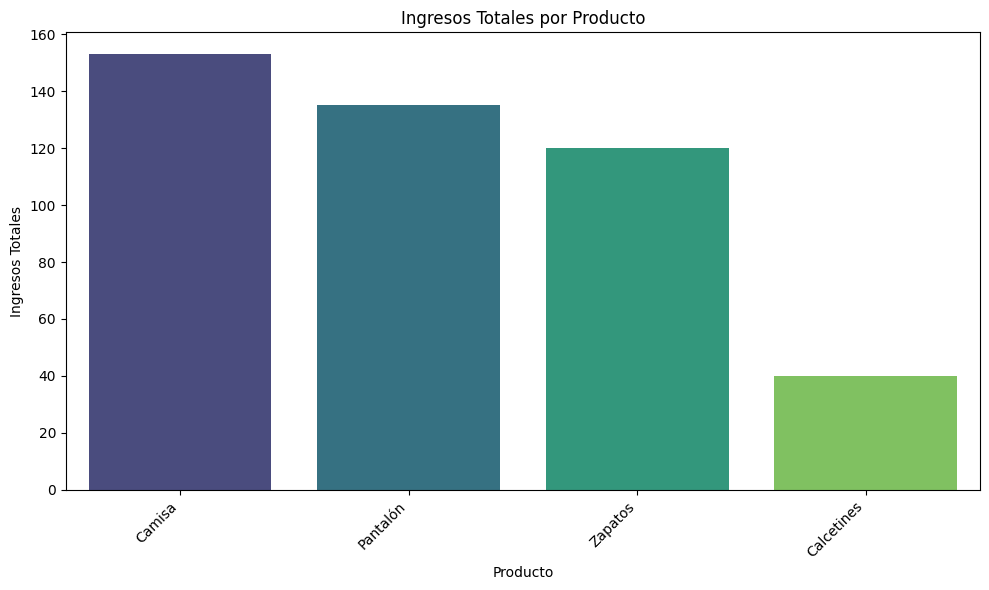

In [6]:
# Calcular el total de ventas por producto
ventas_por_producto = df.groupby('Nombre_Producto')['Total_Venta'].sum().sort_values(ascending=False)

print("Total de ingresos por producto (de mayor a menor):")
print(ventas_por_producto)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=ventas_por_producto.index, y=ventas_por_producto.values, palette='viridis')
plt.title('Ingresos Totales por Producto')
plt.xlabel('Producto')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad
plt.tight_layout() # Ajustar el diseño para que no se corten las etiquetas
plt.show()


Total de ingresos por país (de mayor a menor):
Pais
España       136.0
Argentina    120.0
México       102.0
Chile         90.0
Name: Total_Venta, dtype: float64


/tmp/ipython-input-7-3375267151.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ventas_por_pais.index, y=ventas_por_pais.values, palette='coolwarm')


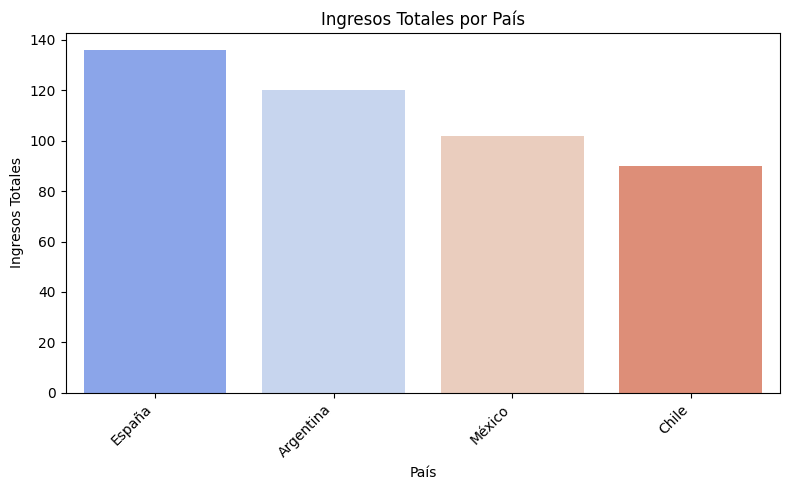

In [7]:
# Calcular el total de ventas por país
ventas_por_pais = df.groupby('Pais')['Total_Venta'].sum().sort_values(ascending=False)

print("\nTotal de ingresos por país (de mayor a menor):")
print(ventas_por_pais)

# Visualización de los resultados
plt.figure(figsize=(8, 5))
sns.barplot(x=ventas_por_pais.index, y=ventas_por_pais.values, palette='coolwarm')
plt.title('Ingresos Totales por País')
plt.xlabel('País')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Frecuencia de Métodos de Pago:
Metodo_Pago
Tarjeta          4
Efectivo         2
Transferencia    2
Name: count, dtype: int64


/tmp/ipython-input-8-1956435393.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_metodos_pago.index, y=conteo_metodos_pago.values, palette='plasma')


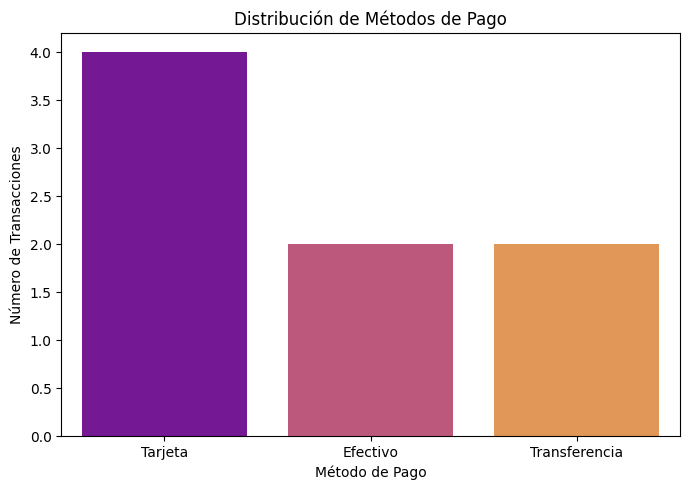

In [8]:
# Contar la frecuencia de cada método de pago
conteo_metodos_pago = df['Metodo_Pago'].value_counts()

print("\nFrecuencia de Métodos de Pago:")
print(conteo_metodos_pago)

# Visualización de los resultados con un gráfico de barras
plt.figure(figsize=(7, 5))
sns.barplot(x=conteo_metodos_pago.index, y=conteo_metodos_pago.values, palette='plasma')
plt.title('Distribución de Métodos de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Transacciones')
plt.tight_layout()
plt.show()


El valor promedio de una transacción es: 56.00


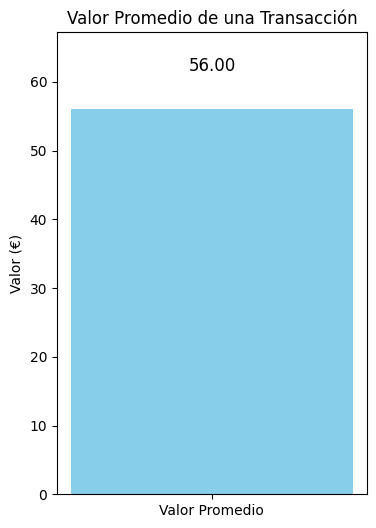

In [9]:
# Calcular el valor promedio de una transacción
valor_promedio_transaccion = df['Total_Venta'].mean()

print(f"\nEl valor promedio de una transacción es: {valor_promedio_transaccion:.2f}")

# Opcional: Visualización simple del valor promedio (esto es más para mostrar un número que una distribución)
# Podríamos usar un histograma si tuviéramos más datos para ver la distribución de los totales de venta
# Pero para un solo número, una visualización de un solo punto no es muy informativa.
# Sin embargo, podemos usar un gráfico de dispersión o una línea si queremos ser creativos.
# Para este caso, un texto claro es suficiente, o un gráfico de barras simple con una sola barra.

# Visualización:
plt.figure(figsize=(4, 6))
plt.bar(['Valor Promedio'], [valor_promedio_transaccion], color='skyblue')
plt.title('Valor Promedio de una Transacción')
plt.ylabel('Valor (€)')
plt.ylim(0, valor_promedio_transaccion * 1.2) # Ajustar límite y para que se vea bien
plt.text(0, valor_promedio_transaccion + 5, f'{valor_promedio_transaccion:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()